# Google Data Analytics  Professional Certificate Capstone Project
#### By Lekshmi Pillai

#### Objective: Exploratory Data Anaysis on Titanic data.

Dataset url: https://www.kaggle.com/c/titanic


### Introduction

This is my first Data Analytics project using R as a part of the Google Data Analytics Professional Certificate Capstone Project. We will follow the 6 steps of the data analysis process:
* Ask
* Prepare
* Process
* Analyze
* Share
* Act

## Ask

For the Ask step, we will fist get to know the summary of the task given to us:

We are given a dataset that consists names and information about all the paasengers who boarded the fateful Titanic in 1914. We are given different genres of information right from name, age, no. of siblings/spouses, no. of parents/children, etc. which will help us explore data and come to a conclusion.

**Our objective for the day is:**
Investigate on teh data about passengers aboard titanic and comprehend with the help of data visualization as to what factors played a role in survival on the ship.


## Prepare

In this step, we need to import our data. We will do the from this Kaggle data set.

Our dataset was originally split into two sets; a training set and a test set. I have merged teh two .csv files into one and am working with the complete data.

* **Where is your data located?** <br>
This data is located in a Kaggle dataset.
* **How is the data organized?**<br>
This data set is organized into CSVs, separated by columns.
* **Are there issues with bias or credibility in this data? Does your data ROCCC?**<br>
Since this data is provided by Kaggle I assume there wont be a bias and that it completes the ROCCC requirements i.e. Reliable, Original, Comprhensive, Current and Cited.
* **How are you addressing licensing, privacy, security, and accessibility?**<br>
Since it is a publically available data, it is accessible to  everyone who wishes to access it. 
* **How did you verify the data’s integrity?**<br>
They are seperated byrows and columns, each in their proper data type.
* **How does it help you answer your question?**<br>
Data provides us with different answers. In this case, it may be about riders and their preferences.
* **Are there any problems with the data?**<br>
As of now, the data looks fine to me.<br>
.<br>
The data that we use is arranged into several rows and columns:<br> the columns are PassengerId, Survived, PClass, Sex, Age, Sibling/Spouse, Parent/Children, Ticket, Fare, Cabin, Embarked. <br>


## Process

This step we will process and clean the data so as to make it ready for analysis. <br>
Firstly, we will import the libraries and load the dataset.

#### Importing Libraries

In [266]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading the Dataset

In [267]:
titanic = pd.read_csv("TITANIC_data.csv")
print("Dataset is loaded succesfully!")

Dataset is loaded succesfully!


#### Exploring and Understanding the dataset

In [268]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [269]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1310.000000,1310.000000,1310.000000,1047.000000,1310.000000,1310.000000,1309.000000
mean,655.180153,0.377099,2.295420,29.883161,0.498473,0.384733,33.275964
std,377.931893,0.484845,0.837742,14.406751,1.041352,0.865295,51.743697
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.250000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,981.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [270]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1310 non-null   int64  
 1   Survived     1310 non-null   int64  
 2   Pclass       1310 non-null   int64  
 3   Name         1310 non-null   object 
 4   Sex          1310 non-null   object 
 5   Age          1047 non-null   float64
 6   SibSp        1310 non-null   int64  
 7   Parch        1310 non-null   int64  
 8   Ticket       1310 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1308 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.9+ KB


All the Columns are in appropriate datatypes.

In [271]:
titanic.shape

(1310, 12)

There are 1310 rows and 12 columns in the dataset.

In [272]:
titanic.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1015
Embarked          2
dtype: int64

There are 263 cells in 'Age' column, 1 cell in 'Fare' and 1015 cells in 'Cabin' column that has no value. <br>
Since we do not require the 'Fare' and 'Cabin' column, we delete them from our dataset.<br>
We also delete the 'Embarked' and 'Ticket'column from our data.

In [273]:
titanic.drop(columns=["Fare","Cabin","Embarked","Ticket"], axis = 1, inplace = True)
titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0


'Age' is an important column for our analysis and since there are 263 people whos age we dont know, it will hamper our analysis

In [274]:
titanic_no_null = titanic.dropna()

So, whenever we need to use the Age factor in the analysis, we use the one without null values.

#### Our data is now clean and ready for analysis.

## Analyze

In this section of the six-step process, we explore more with the data and find out the trends and relationships that the data shows us.

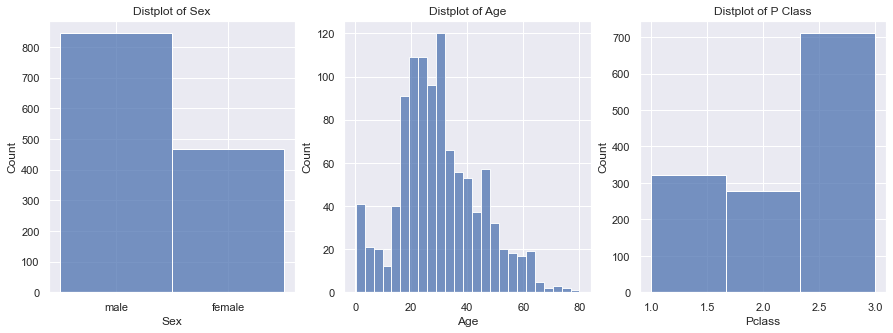

In [275]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")

plt.subplot(1,3,1)
plt.title('Distplot of Sex')
sns.histplot(titanic['Sex'], bins = 2)

plt.subplot(1,3,2)
plt.title('Distplot of Age')
sns.histplot(titanic_no_null['Age'], bins = 25)

plt.subplot(1,3,3)
plt.title('Distplot of P Class')
sns.histplot(titanic['Pclass'], bins = 3)

plt.show()

From the above graphs, we conclude three things:<br>
* There were more men than women in the ship
* Most people who travelled on the ship were from the 20 - 30 age group
* There were more people travelling in the hird class than in First or Second Class

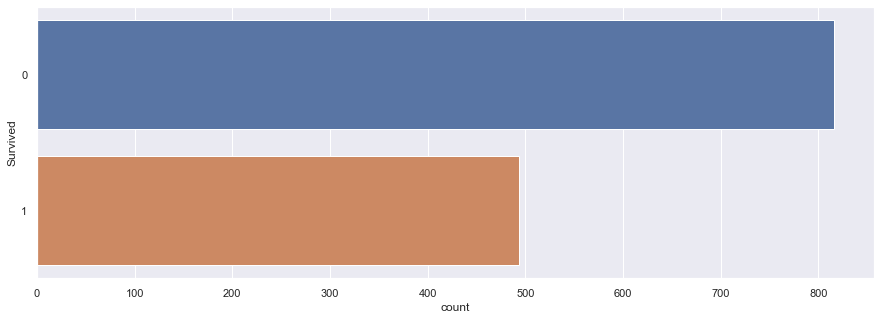

In [276]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(y='Survived', data = titanic)
plt.show()

The number of people who survived the drowning of the Titanic is less, compared to people who died.

Now, we check the relation between the class and survival status of the people.

<AxesSubplot:xlabel='Survived', ylabel='count'>

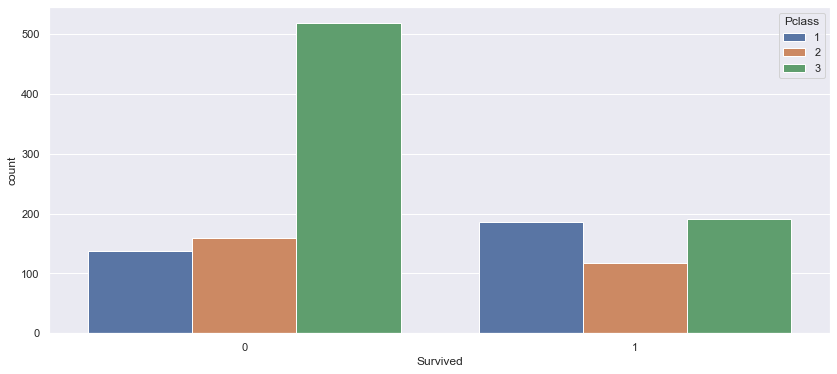

In [277]:
plt.figure(figsize=(14,6))
sns.countplot(x=titanic['Survived'],hue=titanic['Pclass'])

This gives us a shocking revelation that, the maximum number of people who lost their lives were from third class.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

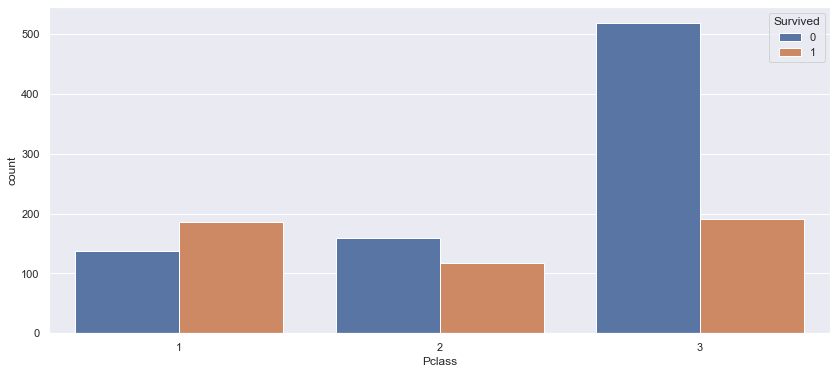

In [278]:
plt.figure(figsize=(14,6))
sns.countplot(x=titanic['Pclass'],hue=titanic['Survived'])

When we check the other way round, we notice that, in the first class, more people survived, compared to number of people who died and in the third class, the ratio of the number of people who survived to number of people died is more than double.

<AxesSubplot:xlabel='Survived', ylabel='count'>

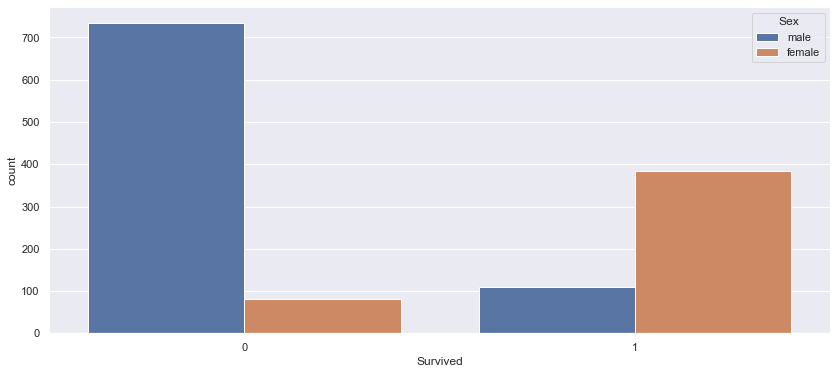

In [279]:
plt.figure(figsize=(14,6))
sns.countplot(x=titanic['Survived'],hue=titanic['Sex'])

Very few females lost their lives, most of them survived as opposed to men who contribute to most of the dying population.

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

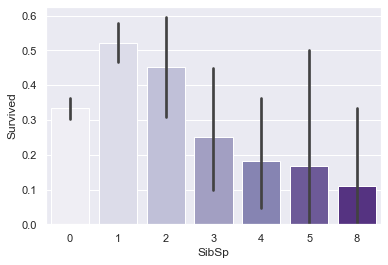

In [280]:
sns.barplot(x='SibSp', y='Survived',data=titanic,palette='Purples')

People with one or two siblings/spouse on board survived more as compared to people with more.

[94, 515, 343, 95]


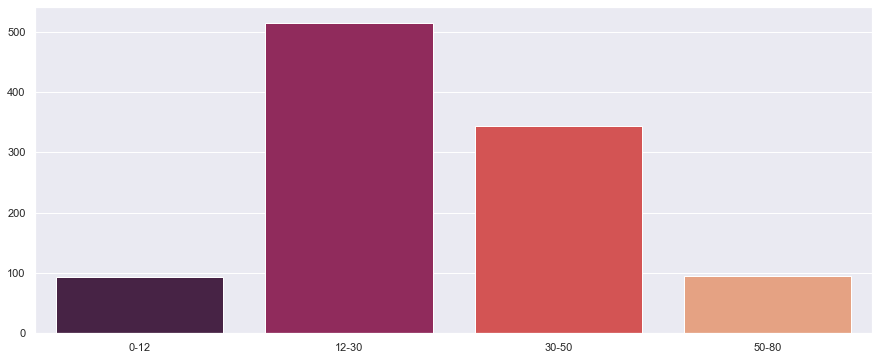

In [281]:
age_0_12 = titanic.Age [(titanic.Age >= 0) & (titanic.Age <= 12) ]
age_12_30 = titanic.Age [(titanic.Age > 12) & (titanic.Age <= 30)]
age_30_50 = titanic.Age [(titanic.Age > 30) & (titanic.Age <= 50)]
age_50_80 = titanic.Age [(titanic.Age > 50) & (titanic.Age <= 80)]

age_x = ['0-12','12-30','30-50','50-80']
age_y = [len(age_0_12),len(age_12_30),len(age_30_50),len(age_50_80)]

plt.figure(figsize=(15,6))
sns.barplot(x=age_x, y=age_y, palette = "rocket")

print(age_y)

plt.show()

There are 94 children below the age of 12. Lets check the survival rate of these children.

## Share

##### DataFrame of children alone

In [282]:
children = titanic.query('Age<=12')

In [283]:
children

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2
...,...,...,...,...,...,...,...,...
1218,1218,1,2,"Becker, Miss. Ruth Elizabeth",female,12.00,2,1
1246,1246,1,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2
1271,1271,0,3,"Asplund, Master. Carl Edgar",male,5.00,4,2
1281,1281,0,3,"Palsson, Master. Paul Folke",male,6.00,3,1


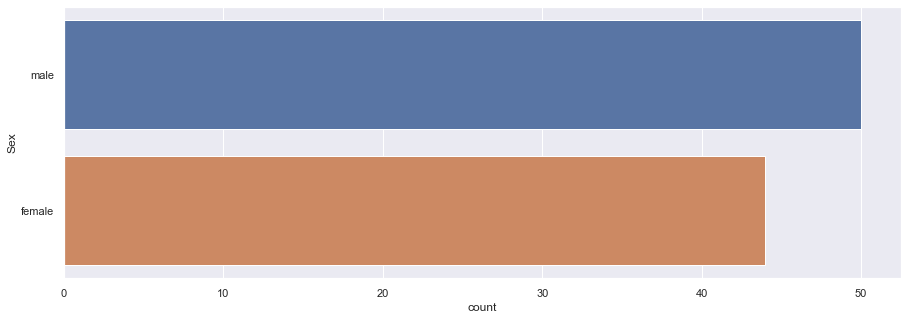

In [284]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(y='Sex', data = children)
plt.show()

There were more male children than female children however the difference was minimal

<AxesSubplot:xlabel='SibSp', ylabel='count'>

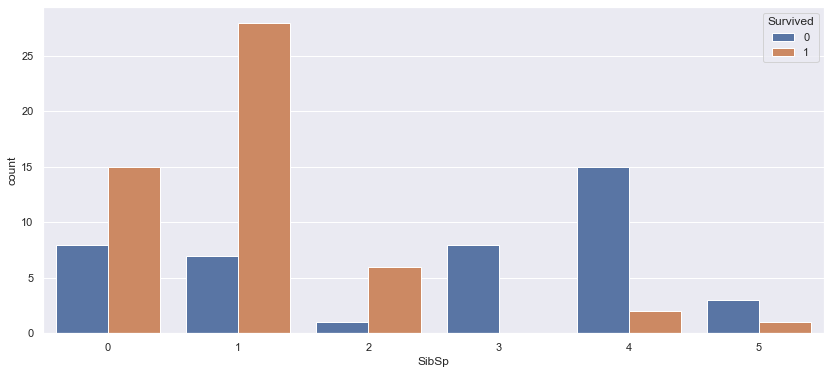

In [285]:
plt.figure(figsize=(14,6))
sns.countplot(x=children['SibSp'],hue=titanic['Survived'])

More children who had less than 2 siblings survived. As the number of siblings increased, tehe chance of survival reduced.

In [286]:
children_survived = children.query('Survived>=1')
children_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.00,0,2
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1


In [287]:
children_notsurvived = children.query('Survived<1')
children_notsurvived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.00,2,2
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1
171,172,0,3,"Rice, Master. Arthur",male,4.00,4,1


<AxesSubplot:xlabel='SibSp', ylabel='count'>

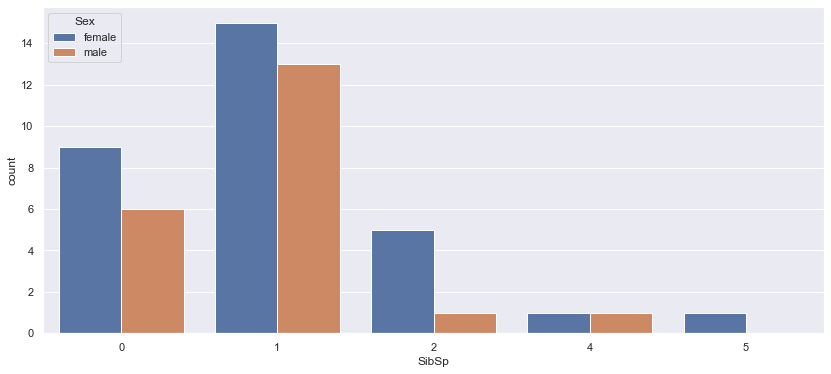

In [288]:
plt.figure(figsize=(14,6))
sns.countplot(x=children_survived['SibSp'],hue=children_survived['Sex'])

Maximum children who survived were the ones with 0 or one siblings. This countplot also shows  us the harrowing fact that none of the male children with 5 siblings or more srvived 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

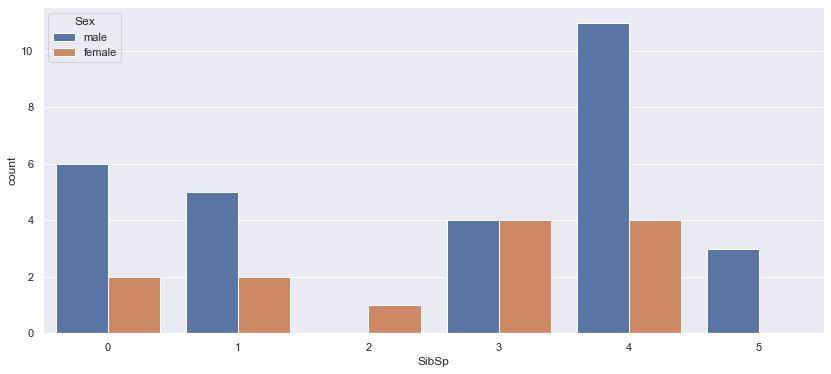

In [289]:
plt.figure(figsize=(14,6))
sns.countplot(x=children_notsurvived['SibSp'],hue=children_notsurvived['Sex'])

Many male children with 4 siblings did not survive

### Acording to my analysis, I have come to these conclusions: <br>
* More Men lost their lives than Women.
* Being a passenger of first class gave you more probability of survival than the rest.
* Maximum passengers aboard the ship were from the age group 20 - 30.
* People with more siblings/spouse lost their lives more.
* There were 94 children on the ship and most of the male children who had 3 or more siblings lost their lives. No of children with 0, 1 or 2 siblings who were ssaveed was much more than No. of chhildren who lost their lives and had more than 3 siblings.
* Being a male child with more than 3 siblings was the most affected catagory. This was the catagory in which maximum lives were lost